In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)
len(test_data)

2246

In [3]:
word_index = reuters.get_word_index()

In [4]:
reverse_word_index = dict([value, key] for (key, value) in word_index.items())

In [5]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [6]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(2280, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1280, activation='relu'))
model.add(layers.Dense(1280, activation='relu'))
model.add(layers.Dense(1280, activation='relu'))
model.add(layers.Dense(1280, activation='relu'))
model.add(layers.Dense(1280, activation='relu'))
model.add(layers.Dense(1280, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train, one_hot_train_labels, epochs=20, batch_size=512, validation_data=(x_val, y_val))
end = timer()
print(end - start)

Train on 8982 samples, validate on 1000 samples
Epoch 1/20
8982/8982 [==============================] - 16s 2ms/step - loss: 10.1107 - acc: 0.3300 - val_loss: 10.4123 - val_acc: 0.3540
Epoch 2/20
8982/8982 [==============================] - 15s 2ms/step - loss: 10.4493 - acc: 0.3517 - val_loss: 10.4123 - val_acc: 0.3540
Epoch 3/20
8982/8982 [==============================] - 15s 2ms/step - loss: 10.4493 - acc: 0.3517 - val_loss: 10.4123 - val_acc: 0.3540
Epoch 4/20
8982/8982 [==============================] - 15s 2ms/step - loss: 10.4493 - acc: 0.3517 - val_loss: 10.4123 - val_acc: 0.3540
Epoch 5/20
8982/8982 [==============================] - 17s 2ms/step - loss: 10.4493 - acc: 0.3517 - val_loss: 10.4123 - val_acc: 0.3540
Epoch 6/20
8982/8982 [==============================] - 16s 2ms/step - loss: 10.4493 - acc: 0.3517 - val_loss: 10.4123 - val_acc: 0.3540
Epoch 7/20
8982/8982 [==============================] - 15s 2ms/step - loss: 10.4493 - acc: 0.3517 - val_loss: 10.4123 - val_acc: 

KeyboardInterrupt: 

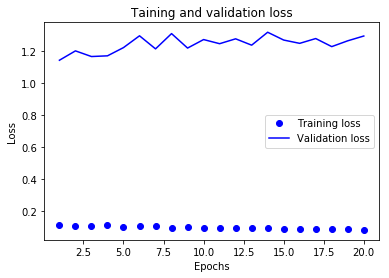

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title('Taining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

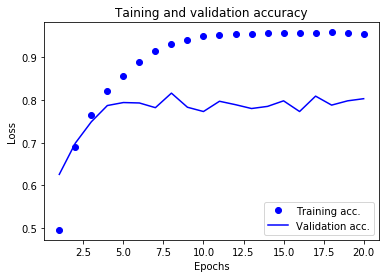

In [26]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc.')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc.')
plt.title('Taining and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()